# Sarcasm Detection using Neural Networks

## Import Libraries

In [226]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import tensorflow as tf

#importing libraries for model building and evaluation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import classification_report, confusion_matrix


In [195]:
import pandas as pd

# Load JSON data from a file with multiple JSON objects per line
df = pd.read_json('/content/Sarcasm_Headlines_Dataset.json', lines=True)

In [3]:
df

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


##Data Cleaning and Visualization

In [41]:
df.isnull().sum()

,0
article_link,0
headline,0
is_sarcastic,0


In [42]:
df.duplicated().sum()

1

In [196]:
df.drop_duplicates(inplace=True)

<ipython-input-13-19a1f659bf5d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_sarcastic', data=df, palette="Set1").set_title(


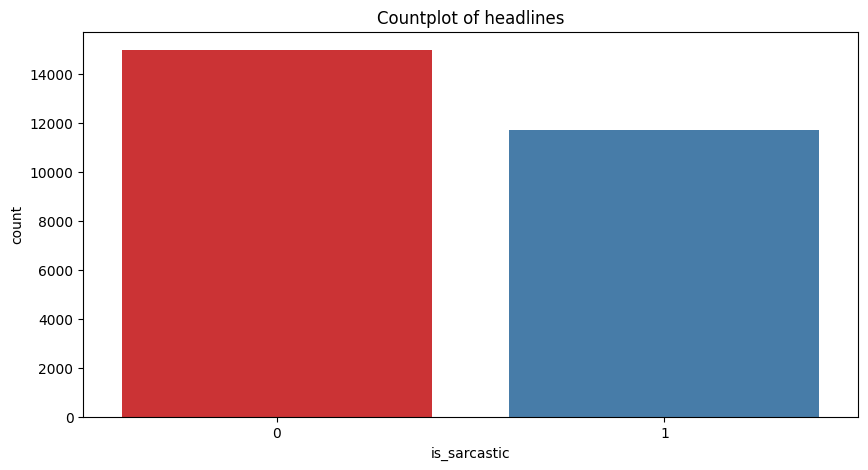

In [13]:
# Check the dataset label balance or not

# Check number of headlines by is_sarcastics
plt.figure(figsize=(10, 5))
sns.countplot(x='is_sarcastic', data=df, palette="Set1").set_title(
	"Countplot of headlines")
plt.show()


In [112]:
#downloading the stopwords corpus list
nltk.download('stopwords')
stopwords_list = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [197]:
def clean_text(sentences):
	# convert text to lowercase
	text = sentences.lower()
	# remove text in square brackets
	text = re.sub('\[.*?\]', '', text)
	# removing punctuations
	text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
	# removing words containing digits
	text = re.sub('\w*\d\w*', '', text)
	# Join the words
	text = ' '.join([word for word in text.split()
					if word not in stopwords_list])
	return text


print(df['headline'].iloc[1])
clean_text(df['headline'].iloc[1])


the 'roseanne' revival catches up to our thorny political mood, for better and worse


'roseanne revival catches thorny political mood better worse'

In [198]:
#new column to store cleaned text
df['cleaned_headline']=df['headline'].map(clean_text)


In [115]:
df

,article_link,headline,is_sarcastic,cleaned_headline
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0,former versace store clerk sues secret black c...
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0,roseanne revival catches thorny political mood...
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1,mom starting fear sons web series closest thin...
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1,boehner wants wife listen come alternative deb...
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0,jk rowling wishes snape happy birthday magical...
...,...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0,american politics moral freefall
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0,americas best hikes
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0,reparations obama
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0,israeli ban targeting boycott supporters raise...


###Most Frequent Word in Sarcastic Headlines

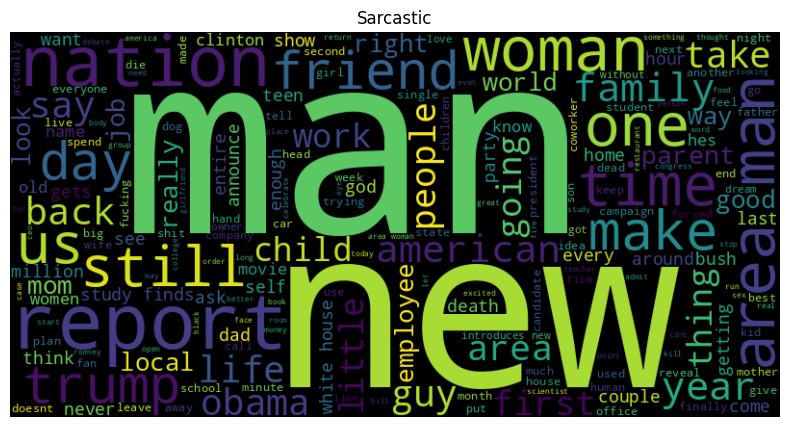

In [116]:
# Combine all sarcastic cleaned headlines into a single text
import matplotlib.pyplot as plt
from wordcloud import WordCloud
Sarcastic_text = ' '.join(
	df['cleaned_headline'][df['is_sarcastic'] == 1].tolist())

# Create a WordCloud object with specified width, height, and background color
wordcloud = WordCloud(width=800, height=400,
					background_color='black').generate(Sarcastic_text)

# Display the WordCloud without axes
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Sarcastic')
plt.show()


###Most Frequent Word in Non-Sarcastic Headlines

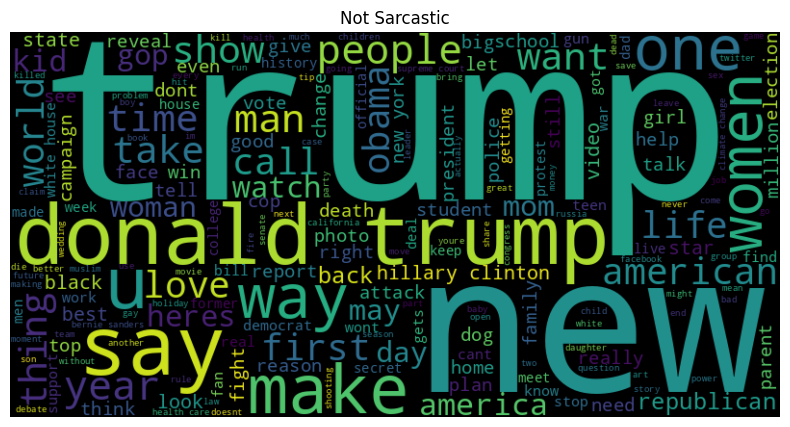

In [117]:
# Combine all non-sarcastic cleaned headlines into a single text
Non_Sarcastic_text = ' '.join(
	df['cleaned_headline'][df['is_sarcastic'] == 0].tolist())

# Create a WordCloud object with specified width, height, and background color
wordcloud = WordCloud(width=800, height=400,
					background_color='black').generate(Non_Sarcastic_text)

# Display the WordCloud without axes
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Not Sarcastic')
plt.show()


In [199]:
#coverting the columns into lists
text = df['cleaned_headline'].tolist()
label = df['is_sarcastic'].tolist()


In [200]:
# train :test : validation = 80:10:10
train_portion = .8

# Set the train size using training_portion arg
train_size = int(len(text) * train_portion)

# Training dataset
train_text = text[:train_size]
train_label = label[:train_size]
# Validations dataset
valid_size = train_size+int((len(text)-train_size)/2)
val_text = text[train_size:valid_size]
val_label = label[train_size:valid_size]
# Testing dataset
test_text = text[valid_size:]
test_label = label[valid_size:]

# Check
print('Training data :', len(train_text), len(train_label))
print('Validations data :', len(val_text), len(val_label))
print('Testing data :', len(test_text), len(test_label))


Training data : 21366 21366
Validations data : 2671 2671
Testing data : 2671 2671


Here, the dataset is split into training, testing, and validation subsets using an 80:10:10 ratio. The sizes of these subsets are calculated, and the corresponding text data is extracted. The sizes of each subset are then printed for verification.

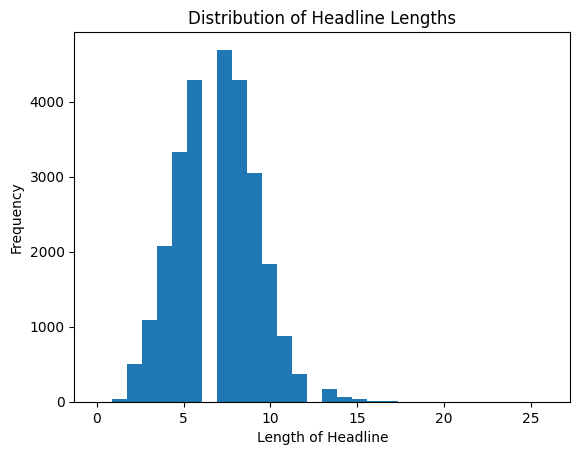

In [120]:
lengths = [len(text.split()) for text in text]  # Calculate the length of each cleaned headline
plt.hist(lengths, bins=30)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Length of Headline')
plt.ylabel('Frequency')
plt.show()


In [121]:
import pandas as pd

# Calculate the length of each cleaned headline
lengths = [len(text.split()) for text in text]

# Create a DataFrame for lengths and their frequencies
length_counts = pd.Series(lengths).value_counts().sort_index()
length_counts_df = pd.DataFrame(length_counts).reset_index()
length_counts_df.columns = ['Headline Length', 'Frequency']

# Print the table
print(length_counts_df)


    Headline Length  Frequency
0                 0          2
1                 1         40
2                 2        501
3                 3       1083
4                 4       2072
5                 5       3325
6                 6       4294
7                 7       4693
8                 8       4289
9                 9       3054
10               10       1832
11               11        870
12               12        370
13               13        168
14               14         66
15               15         34
16               16          6
17               17          3
18               19          2
19               22          1
20               24          1
21               25          1
22               26          1


In [122]:
import numpy as np

max_ilength = int(np.percentile(lengths, 90))
print("90th Percentile Length:", max_ilength)


90th Percentile Length: 10


We choose the max length to be 16 after noticing majority of the lengths of the headlines are 10.

In [201]:
vocab_size = 10000

# Embedding dimension value
embedding_dim = 200

# Max length of sentence
max_length = 16

# pad_sequences arg
padding_type = 'post'

# Unknow words = <OOV>
oov_tok = '<OOV>'

# Tokenizing and padding
# Create a tokenizer with a specified vocabulary size and out-of-vocabulary token
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
# Fit the tokenizer on the training text data to create word-to-index mapping
tokenizer.fit_on_texts(train_text)


In [202]:
# Get the word index from the tokenizer
word_index = tokenizer.word_index

#Printing the word_index
word_index


{'<OOV>': 1,
 'new': 2,
 'trump': 3,
 'man': 4,
 'us': 5,
 'one': 6,
 'report': 7,
 'area': 8,
 'donald': 9,
 'says': 10,
 'woman': 11,
 'day': 12,
 'get': 13,
 'time': 14,
 'first': 15,
 'like': 16,
 'trumps': 17,
 'people': 18,
 'obama': 19,
 'life': 20,
 'house': 21,
 'women': 22,
 'back': 23,
 'still': 24,
 'make': 25,
 'white': 26,
 'clinton': 27,
 'americans': 28,
 'could': 29,
 'world': 30,
 'years': 31,
 'way': 32,
 'family': 33,
 'study': 34,
 'black': 35,
 'gop': 36,
 'bill': 37,
 'best': 38,
 'show': 39,
 'watch': 40,
 'would': 41,
 'really': 42,
 'president': 43,
 'police': 44,
 'things': 45,
 'know': 46,
 'finds': 47,
 'cant': 48,
 'good': 49,
 'video': 50,
 'going': 51,
 'death': 52,
 'love': 53,
 'school': 54,
 'american': 55,
 'hillary': 56,
 'year': 57,
 'home': 58,
 'nation': 59,
 'health': 60,
 'last': 61,
 'may': 62,
 'state': 63,
 'need': 64,
 'parents': 65,
 'every': 66,
 'say': 67,
 'big': 68,
 'gets': 69,
 'work': 70,
 'take': 71,
 'campaign': 72,
 'little': 73,

In [203]:
# Convert training text to sequences of word indices
tokenizer.texts_to_sequences(train_text[:5])


[[210, 1, 696, 3721, 2158, 258, 35, 1692, 2535, 8801],
 [6811, 2794, 2795, 8802, 259, 2536, 153, 787],
 [74, 788, 617, 789, 1897, 470, 4774, 120, 8803],
 [1195, 121, 286, 1410, 184, 2537, 1, 752],
 [4775, 5602, 860, 8804, 485, 440, 1141, 32]]

Converting text into sequences of integers is crucial for machine learning models, as they require numerical input. This process improves efficiency, reduces dimensionality, and maintains word order, allowing models to capture semantic relationships through embeddings. Ultimately, it enhances the model's understanding of context and meaning in natural language processing tasks.

In [204]:
# Tokenize and pad the training text data
# Convert training text to sequences of word indices
train_indices = tokenizer.texts_to_sequences(train_text)
# Pad sequences to a fixed length
train_padded = pad_sequences(train_indices,
							padding=padding_type,
							maxlen=max_length)


In [205]:
# Convert validation text to sequences of word indices
val_indices = tokenizer.texts_to_sequences(val_text)
# Pad sequences to a fixed length
validation_padded = pad_sequences(val_indices,
								padding=padding_type,
								maxlen=max_length)

# Convert test text to sequences of word indices
test_indices = tokenizer.texts_to_sequences(test_text)
# Pad sequences to a fixed length
test_padded = pad_sequences(test_indices,
							padding=padding_type,
							maxlen=max_length)

# Check
print('Training vector :', train_padded.shape)
print('Validations vector :', validation_padded.shape)
print('Testing vector :', test_padded.shape)


Training vector : (21366, 16)
Validations vector : (2671, 16)
Testing vector : (2671, 16)


In [206]:
# Decode the sample training vector
tokenizer.sequences_to_texts([train_padded[0].tolist()])


['former <OOV> store clerk sues secret black code minority shoppers <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>']

In [207]:
# Prepare labels for model
training_labels_final = np.array(train_label)
validation_labels_final = np.array(val_label)
testing_labels_final = np.array(test_label)


# Check shapes
print('Training vector :', training_labels_final.shape)
print('Validations vector :', validation_labels_final.shape)
print('Testing vector :', testing_labels_final.shape)


Training vector : (21366,)
Validations vector : (2671,)
Testing vector : (2671,)


In [23]:
training_labels_final

array([0, 0, 1, ..., 0, 1, 1])

After extensive experimentation with various architectures, the Hybrid CNN-LSTM Model emerged as the most accurate. The trials included variations in `max_length`, different activation functions, and the use or omission of learning rate adjustments and early stopping. Additionally, models with different numbers of dense layers and embedding dimensions were tested. Regularization techniques were also explored, though they led to lower accuracy. Despite these efforts, the accuracy consistently ranged between 77% and 80%. The highest accuracy achieved, after numerous trials, was with the following model.

CNN-LSTM Model

This code defines and trains a deep learning model using TensorFlow Keras for text classification. It combines multiple convolutional layers and bidirectional LSTM layers to capture both local and sequential features from text data. The model is compiled with the Adam optimizer and binary cross-entropy loss, and trained with early stopping to prevent overfitting, aiming to achieve the best performance on validation data.

In [217]:
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, GlobalMaxPooling1D, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model

vocab_size = 10000
embedding_dim = 200
max_length = 16

inputs = Input(shape=(max_length,))
x = Embedding(vocab_size, embedding_dim, input_length=max_length)(inputs)

# Multiple parallel CNN layers
conv1 = Conv1D(128, 3, activation='relu', padding='same')(x)
conv2 = Conv1D(128, 4, activation='relu', padding='same')(x)
conv3 = Conv1D(128, 5, activation='relu', padding='same')(x)

pool1 = GlobalMaxPooling1D()(conv1)
pool2 = GlobalMaxPooling1D()(conv2)
pool3 = GlobalMaxPooling1D()(conv3)

# Bidirectional LSTM layers
lstm1 = Bidirectional(LSTM(64, return_sequences=True))(x)
lstm2 = Bidirectional(LSTM(64))(lstm1)

# Concatenate CNN and LSTM outputs
merged = Concatenate()([pool1, pool2, pool3, lstm2])

dense1 = Dense(128, activation='relu')(merged)
dense2 = Dense(64, activation='relu')(dense1)
outputs = Dense(1, activation='sigmoid')(dense2)

model2 = Model(inputs=inputs, outputs=outputs)

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history2 = model2.fit(train_padded, training_labels_final,
                    epochs=20,
                    batch_size=32,
                    validation_data=(validation_padded, validation_labels_final),
                    callbacks=[early_stopping])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 93s 124ms/step - accuracy: 0.7032 - loss: 0.5469 - val_accuracy: 0.8072 - val_loss: 0.4199
Epoch 2/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 138s 118ms/step - accuracy: 0.9121 - loss: 0.2156 - val_accuracy: 0.8023 - val_loss: 0.4538
Epoch 3/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 79s 114ms/step - accuracy: 0.9776 - loss: 0.0691 - val_accuracy: 0.7941 - val_loss: 0.7644
Epoch 4/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 83s 116ms/step - accuracy: 0.9919 - loss: 0.0224 - val_accuracy: 0.7825 - val_loss: 1.0199
Epoch 5/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 82s 116ms/step - accuracy: 0.9965 - loss: 0.0120 - val_accuracy: 0.7844 - val_loss: 1.3483
Epoch 6/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 78s 117ms/step - accuracy: 0.9969 - loss: 0.0089 - val_accuracy: 0.7922 - val_loss: 1.3853


In [228]:
model2.summary()

Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_35            │ (None, 16)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_36 (Embedding)  │ (None, 16, 200)        │      2,000,000 │ input_layer_35[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_21 (Conv1D)        │ (None, 16, 128)        │         76,928 │ embedding_36[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_22 (Conv1D)        │ (None, 16, 128)        │        102,528 │ embedding_36[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_23 (Conv1D)        │ (None, 16, 128)        │        128,128 │ embedding_36[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_14          │ (None, 16, 128)        │        135,680 │ embedding_36[0][0]     │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_46   │ (None, 128)            │              0 │ conv1d_21[0][0]        │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_47   │ (None, 128)            │              0 │ conv1d_22[0][0]        │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_48   │ (None, 128)            │              0 │ conv1d_23[0][0]        │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_15          │ (None, 128)            │         98,816 │ bidirectional_14[0][0] │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_7             │ (None, 512)            │              0 │ global_max_pooling1d_… │
│ (Concatenate)             │                        │                │ global_max_pooling1d_… │
│                           │                        │                │ global_max_pooling1d_… │
│                           │                        │                │ bidirectional_15[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_117 (Dense)         │ (None, 128)            │         65,664 │ concatenate_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_118 (Dense)         │ (None, 64)             │          8,256 │ dense_117[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_119 (Dense)         │ (None, 1)              │             65 │ dense_118[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 7,848,197 (29.94 MB)

 Trainable params: 2,616,065 (9.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,232,132 (19.96 MB)

In [218]:
#evaluating loss and accuray of the model
loss, accuracy = model2.evaluate(test_padded,testing_labels_final)
print(f'Accuracy on test dataset :{round(accuracy*100,2)}%')

84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8111 - loss: 0.4073
Accuracy on test dataset :81.17%


In [220]:
#predicting the model

pred_prob = model2.predict(test_padded)
pred_label = [1 if prob >= 0.5 else 0 for prob in pred_prob]
pred_label[:5]
testing_labels_final[:5]

84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step


array([1, 0, 1, 1, 0])

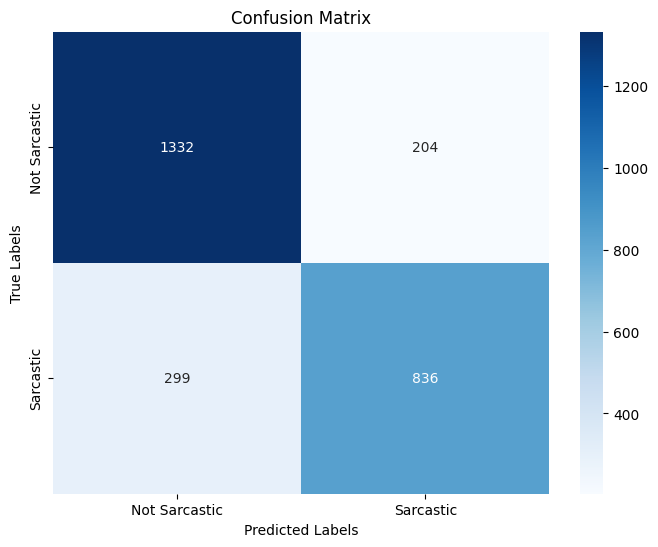

In [222]:
# Compute confusion matrix using the predicted classes and true labels
conf_matrix = confusion_matrix(testing_labels_final, pred_label)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
			xticklabels=['Not Sarcastic', 'Sarcastic'],
			yticklabels=['Not Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [223]:
# Print Classification Report
print("\nClassification Report:")
print(classification_report(testing_labels_final, pred_label,
							target_names=['Not Sarcastic', 'Sarcastic']))



Classification Report:
               precision    recall  f1-score   support

Not Sarcastic       0.82      0.87      0.84      1536
    Sarcastic       0.80      0.74      0.77      1135

     accuracy                           0.81      2671
    macro avg       0.81      0.80      0.80      2671
 weighted avg       0.81      0.81      0.81      2671



In [225]:
while True:
	# Prompt the user to input a headline or exit
	user_input = input(
		"Enter a headline for prediction (or type 'exit' to quit): ")

	# Check if the user wants to exit
	if user_input.lower() == 'exit':
		break

	# Clean and preprocess user input
	cleaned_input = clean_text(user_input)
	tokenized_input = tokenizer.texts_to_sequences([cleaned_input]) # Tokenize the cleaned text
	padded_input = pad_sequences(tokenized_input, maxlen=max_length, padding=padding_type) # Pad the tokenized text

	# Predict sarcasm
	prediction = model2.predict(padded_input)

	# Print the prediction result
	if prediction >= 0.5:
		print(f"Headline: {user_input}\nPrediction: Sarcastic")
	else:
		print(f"Headline: {user_input}\nPrediction: Not Sarcastic")


Enter a headline for prediction (or type 'exit' to quit): Nation Shocked to Discover Politicians Actually Attend Political Fundraisers
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Headline: Nation Shocked to Discover Politicians Actually Attend Political Fundraisers
Prediction: Sarcastic
Enter a headline for prediction (or type 'exit' to quit): Study Reveals People Who Talk Loudly on Phone Enjoy Solitary Confinement
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Headline: Study Reveals People Who Talk Loudly on Phone Enjoy Solitary Confinement
Prediction: Sarcastic
Enter a headline for prediction (or type 'exit' to quit): Tim Walz Pick Signals Progressive Confidence on Climate Policy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Headline: Tim Walz Pick Signals Progressive Confidence on Climate Policy
Prediction: Not Sarcastic
Enter a headline for prediction (or type 'exit' to quit): D.C. Memo: Hot rematch between Omar and Samuels heads to the finish line, with a bizarre twist
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/

###The Model seems to be working pretty well with its accurate labels of the given Headlines.